<a href="https://colab.research.google.com/github/2303a51585/23CSBTB27-28/blob/main/RL(MDPs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np

# Define MDP components
states = [0, 1, 2]       # S0, S1, S2
actions = [0, 1]         # a0, a1
gamma = 0.9              # Discount factor

# Transition probabilities and rewards
# P[s][a] = list of (probability, next_state, reward)
P = {
    0: {
        0: [(1.0, 1, 5)],   # S0, a0 -> S1, reward 5
        1: [(1.0, 0, 0)]    # S0, a1 -> S0, reward 0
    },
    1: {
        0: [(1.0, 2, 10)],  # S1, a0 -> S2, reward 10
        1: [(1.0, 0, -1)]   # S1, a1 -> S0, reward -1
    },
    2: {
        0: [(1.0, 2, 0)],   # S2 terminal
        1: [(1.0, 2, 0)]
    }
}


In [6]:
def value_iteration(theta=1e-6):
    V = np.zeros(len(states))

    while True:
        delta = 0
        for s in states:
            v = V[s]
            # Bellman optimality update
            V[s] = max(
                sum(prob * (reward + gamma * V[next_s])
                    for prob, next_s, reward in P[s][a])
                for a in actions
            )
            delta = max(delta, abs(v - V[s]))

        if delta < theta:
            break

    # Derive optimal policy
    policy = np.zeros(len(states), dtype=int)
    for s in states:
        policy[s] = np.argmax([
            sum(prob * (reward + gamma * V[next_s])
                for prob, next_s, reward in P[s][a])
            for a in actions
        ])
    return V, policy


In [7]:
def policy_iteration():
    policy = np.random.choice(actions, size=len(states))
    V = np.zeros(len(states))
    is_stable = False

    while not is_stable:
        # Policy Evaluation
        while True:
            delta = 0
            for s in states:
                v = V[s]
                a = policy[s]
                V[s] = sum(prob * (reward + gamma * V[next_s])
                           for prob, next_s, reward in P[s][a])
                delta = max(delta, abs(v - V[s]))
            if delta < 1e-6:
                break

        # Policy Improvement
        is_stable = True
        for s in states:
            old_action = policy[s]
            policy[s] = np.argmax([
                sum(prob * (reward + gamma * V[next_s])
                    for prob, next_s, reward in P[s][a])
                for a in actions
            ])
            if old_action != policy[s]:
                is_stable = False
    return V, policy


In [9]:
# Run Value Iteration
V_vi, pi_vi = value_iteration()

# Run Policy Iteration
V_pi, pi_pi = policy_iteration()

# Display results
print("=== Value Iteration ===")
print("Optimal Values:", V_vi)
print("Optimal Policy:", pi_vi)

print("\n=== Policy Iteration ===")
print("Optimal Values:", V_pi)
print("Optimal Policy:", pi_pi)


=== Value Iteration ===
Optimal Values: [21.57894369 18.42104933  0.        ]
Optimal Policy: [0 1 0]

=== Policy Iteration ===
Optimal Values: [21.57894369 18.42104933  0.        ]
Optimal Policy: [0 1 0]


Value Function V(s):
[[ -1.39  -0.43   0.63   1.81   3.12]
 [ -0.43   0.63   1.81   3.12   4.58]
 [-10.   -10.   -10.     4.58   6.2 ]
 [  1.81   3.12   4.58   6.2    8.  ]
 [  3.12   4.58   6.2    8.    10.  ]]


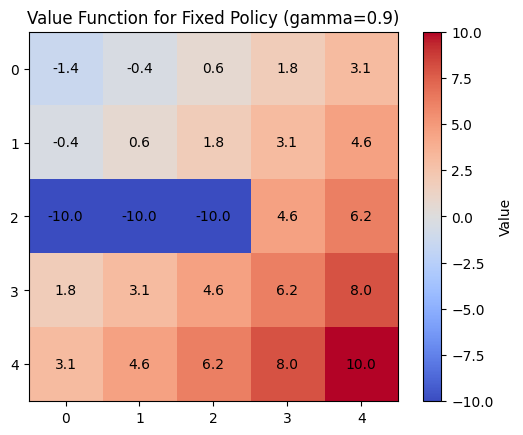


Gamma = 0.5
[[ -1.95  -1.91  -1.81  -1.62  -1.25]
 [ -1.91  -1.81  -1.62  -1.25  -0.5 ]
 [ -4.    -6.   -10.    -0.5    1.  ]
 [ -1.62  -1.25  -0.5    1.     4.  ]
 [ -1.25  -0.5    1.     4.    10.  ]]

Gamma = 0.7
[[ -2.56  -2.24  -1.76  -1.09  -0.13]
 [ -2.24  -1.76  -1.09  -0.13   1.24]
 [ -6.6   -8.   -10.     1.24   3.2 ]
 [ -1.09  -0.13   1.24   3.2    6.  ]
 [ -0.13   1.24   3.2    6.    10.  ]]

Gamma = 0.9
[[ -1.39  -0.43   0.63   1.81   3.12]
 [ -0.43   0.63   1.81   3.12   4.58]
 [-10.   -10.   -10.     4.58   6.2 ]
 [  1.81   3.12   4.58   6.2    8.  ]
 [  3.12   4.58   6.2    8.    10.  ]]

Gamma = 0.99
[[  1.5    2.53   3.56   4.61   5.67]
 [  2.53   3.56   4.61   5.67   6.73]
 [-11.79 -10.9  -10.     6.73   7.81]
 [  4.61   5.67   6.73   7.81   8.9 ]
 [  5.67   6.73   7.81   8.9   10.  ]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# GridWorld parameters
N = 5
goal_state = (4, 4)
pit_state = (2, 2)
gamma = 0.9  # discount factor
theta = 1e-6  # convergence threshold

# Initialize rewards
rewards = np.full((N, N), -1.0)  # default step cost
rewards[goal_state] = 10.0
rewards[pit_state] = -10.0

# Terminal states
terminals = [goal_state, pit_state]

# Fixed policy: move Right if possible, else Down
def next_state(row, col):
    if (row, col) in terminals:
        return (row, col)
    if col < N - 1:
        return (row, col + 1)
    elif row < N - 1:
        return (row + 1, col)
    return (row, col)

# Policy Evaluation for fixed policy
def evaluate_policy(gamma=0.9):
    V = np.zeros((N, N))
    while True:
        delta = 0
        for row in range(N):
            for col in range(N):
                s = (row, col)
                v = V[row, col]
                if s in terminals:
                    V[row, col] = rewards[s]
                else:
                    ns = next_state(row, col)
                    V[row, col] = rewards[s] + gamma * V[ns]
                delta = max(delta, abs(v - V[row, col]))
        if delta < theta:
            break
    return V

# Compute value function
V = evaluate_policy(gamma)

# Display value function as grid
print("Value Function V(s):")
print(np.round(V, 2))

# Visualization
plt.imshow(V, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Value')
plt.title(f"Value Function for Fixed Policy (gamma={gamma})")
for i in range(N):
    for j in range(N):
        plt.text(j, i, f"{V[i,j]:.1f}", ha='center', va='center', color='black')
plt.show()

# Analysis: Effect of gamma
gammas = [0.5, 0.7, 0.9, 0.99]
for g in gammas:
    Vg = evaluate_policy(g)
    print(f"\nGamma = {g}")
    print(np.round(Vg, 2))


Computed Value Function V(s):
[[-5.7  -5.22 -4.69 -4.1  -3.44]
 [-5.22 -4.69 -4.1  -3.44 -2.71]
 [-1.9  -1.    0.   -2.71 -1.9 ]
 [-4.1  -3.44 -2.71 -1.9  -1.  ]
 [-3.44 -2.71 -1.9  -1.    0.  ]]


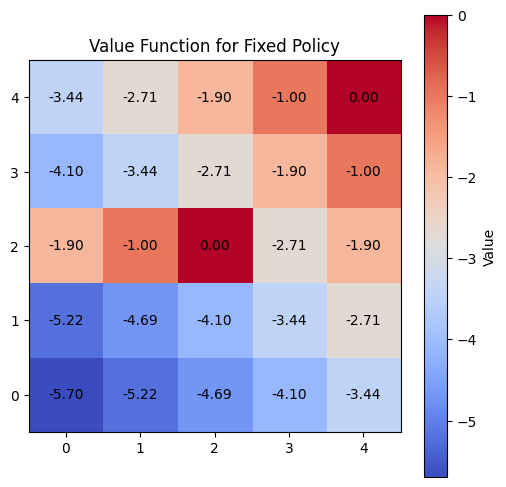

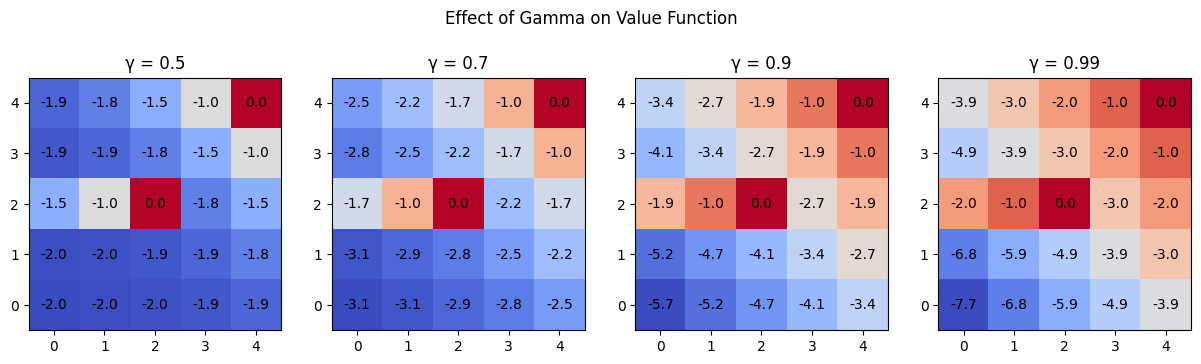

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# GridWorld parameters
N = 5
gamma = 0.9
goal = (4, 4)
pit = (2, 2)
start = (0, 0)

# Rewards
reward_goal = 10
reward_pit = -10
reward_step = -1

# Actions: Right (0,1), Down (1,0)
def next_state(state):
    """Deterministic policy: move Right if possible, else Down"""
    r, c = state
    if c < N - 1:
        return (r, c + 1)
    elif r < N - 1:
        return (r + 1, c)
    else:
        return (r, c)  # Stay if at bottom-right

def reward(state):
    if state == goal:
        return reward_goal
    elif state == pit:
        return reward_pit
    else:
        return reward_step

# Value function initialization
V = np.zeros((N, N))
theta = 1e-6  # Convergence threshold

# Policy evaluation for fixed policy
while True:
    delta = 0
    V_new = np.copy(V)
    for r in range(N):
        for c in range(N):
            s = (r, c)
            if s == goal or s == pit:
                continue  # Terminal states
            s_next = next_state(s)
            V_new[r, c] = reward(s) + gamma * V[s_next]
            delta = max(delta, abs(V_new[r, c] - V[r, c]))
    V = V_new
    if delta < theta:
        break

# Display computed value function
print("Computed Value Function V(s):")
print(np.round(V, 2))

# Visualization
plt.figure(figsize=(6, 6))
plt.imshow(V, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Value")
for r in range(N):
    for c in range(N):
        plt.text(c, r, f"{V[r, c]:.2f}", ha='center', va='center', color='black')
plt.title("Value Function for Fixed Policy")
plt.gca().invert_yaxis()
plt.show()

# Effect of changing gamma
gammas = [0.5, 0.7, 0.9, 0.99]
values_for_gamma = {}

for g in gammas:
    V_temp = np.zeros((N, N))
    while True:
        delta = 0
        V_new = np.copy(V_temp)
        for r in range(N):
            for c in range(N):
                s = (r, c)
                if s == goal or s == pit:
                    continue
                s_next = next_state(s)
                V_new[r, c] = reward(s) + g * V_temp[s_next]
                delta = max(delta, abs(V_new[r, c] - V_temp[r, c]))
        V_temp = V_new
        if delta < theta:
            break
    values_for_gamma[g] = V_temp

# Plot value functions for different gamma values
fig, axes = plt.subplots(1, len(gammas), figsize=(15, 4))
for idx, g in enumerate(gammas):
    ax = axes[idx]
    ax.imshow(values_for_gamma[g], cmap="coolwarm", interpolation="nearest")
    ax.set_title(f"γ = {g}")
    ax.invert_yaxis()
    for r in range(N):
        for c in range(N):
            ax.text(c, r, f"{values_for_gamma[g][r, c]:.1f}", ha='center', va='center', color='black')

plt.suptitle("Effect of Gamma on Value Function")
plt.show()


In [11]:
import numpy as np

# Define MDP
states = [0, 1, 2]  # S0, S1, S2
actions = [0, 1]    # a0, a1
gamma = 0.9

# Transition probabilities and rewards
# P[s][a] = list of (prob, next_state, reward)
P = {
    0: {
        0: [(1.0, 1, 5)],   # S0, a0 -> S1, reward 5
        1: [(1.0, 0, 0)]    # S0, a1 -> S0, reward 0
    },
    1: {
        0: [(1.0, 2, 10)],  # S1, a0 -> S2, reward 10
        1: [(1.0, 0, -1)]   # S1, a1 -> S0, reward -1
    },
    2: {
        0: [(1.0, 2, 0)],   # Terminal
        1: [(1.0, 2, 0)]
    }
}

# -------------------
# Value Iteration
# -------------------
def value_iteration(theta=1e-6):
    V = np.zeros(len(states))
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max(
                sum(prob * (reward + gamma * V[next_s])
                    for prob, next_s, reward in P[s][a])
                for a in actions
            )
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    # Derive policy
    policy = np.zeros(len(states), dtype=int)
    for s in states:
        policy[s] = np.argmax([
            sum(prob * (reward + gamma * V[next_s])
                for prob, next_s, reward in P[s][a])
            for a in actions
        ])
    return V, policy

# -------------------
# Policy Iteration
# -------------------
def policy_iteration():
    policy = np.random.choice(actions, size=len(states))
    V = np.zeros(len(states))
    is_stable = False

    while not is_stable:
        # Policy Evaluation
        while True:
            delta = 0
            for s in states:
                v = V[s]
                a = policy[s]
                V[s] = sum(prob * (reward + gamma * V[next_s])
                           for prob, next_s, reward in P[s][a])
                delta = max(delta, abs(v - V[s]))
            if delta < 1e-6:
                break

        # Policy Improvement
        is_stable = True
        for s in states:
            old_action = policy[s]
            policy[s] = np.argmax([
                sum(prob * (reward + gamma * V[next_s])
                    for prob, next_s, reward in P[s][a])
                for a in actions
            ])
            if old_action != policy[s]:
                is_stable = False
    return V, policy

# Run algorithms
V_vi, pi_vi = value_iteration()
V_pi, pi_pi = policy_iteration()

print("Value Iteration:")
print("Optimal Values:", V_vi)
print("Optimal Policy:", pi_vi)

print("\nPolicy Iteration:")
print("Optimal Values:", V_pi)
print("Optimal Policy:", pi_pi)


Value Iteration:
Optimal Values: [21.57894369 18.42104933  0.        ]
Optimal Policy: [0 1 0]

Policy Iteration:
Optimal Values: [21.57894369 18.42104933  0.        ]
Optimal Policy: [0 1 0]
